In [1]:
import matplotlib
from matplotlib import pyplot as plt
from pathlib import Path

from ml_logger.parser.experiment import Experiment, ExperimentSequence
from ml_logger.parser.experiment import Parser as ExperimentParser

In [2]:
base_dir = "~/torch-template/logs"

In [3]:
experiment_parser = ExperimentParser()

In [4]:
def load_all_experiments(base_dir):
    experiments = []

    for log_dir in list(Path(base_dir).iterdir()):
        if log_dir.is_dir():
            print(log_dir)
            experiments.append(experiment_parser.parse(f"{str(log_dir)}/log.jsonl"))
    return ExperimentSequence(experiments)
        

In [5]:
experiment_sequence = load_all_experiments(base_dir)

/private/home/sodhani/projects/torch-template/logs/sample_config
/private/home/sodhani/projects/torch-template/logs/low_lr


In [6]:
def plot_experiment(experiment, mode, x_axis, y_axis):
    df = experiment.metrics["all"]
    df = df[df["mode"] == mode]
    plt.plot(df[x_axis], df[y_axis], label=experiment.config["general"]["id"])

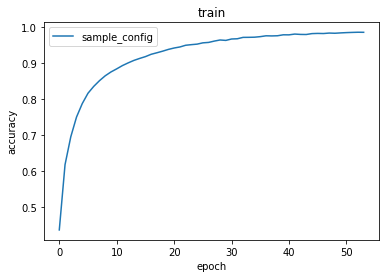

In [7]:
## Plotting the first experiment

experiment = experiment_sequence[0]

mode="train"
x_axis = "epoch"
y_axis = "accuracy"

plot_experiment(experiment, mode=mode, x_axis=x_axis, y_axis=y_axis)
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title(mode)
plt.legend()


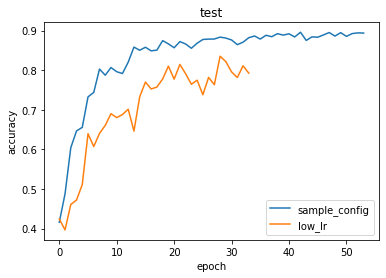

In [8]:
## Plotting all the experiments

mode="test"
x_axis = "epoch"
y_axis = "accuracy"

for experiment in experiment_sequence:
    plot_experiment(experiment, mode=mode, x_axis=x_axis, y_axis=y_axis)
    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title(mode)
plt.legend()